In [68]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot
from sklearn.impute import SimpleImputer
import missingno as mano
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from scipy.stats import kstest, norm
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [70]:
def loading_data():
    filename = input("Please enter file name with extension : ")
    filetype = filename.split(".")
    if filetype[-1] == "xlsx":
        data = pd.read_excel(filename)
    else:
        data = pd.read_csv(filename)
    return data

data = loading_data()

Please enter file name with extension : telecom_users.csv


In [71]:
def data_info(n):
    dimensions = data.shape
    print ("Shape of the data is :",dimensions)
    print ("Number of rows :", dimensions[0])
    print ("Number of columns :", dimensions[1])
    
    #print ("\n")
    print ("\n Columns Types:\n",data.dtypes)
    
    print ("\nThe first",n,"rows of the data are:\n",data.head(n))
    print ("\nThe last",n,"rows of the data are:\n",data.tail(n))
    print (data.info())

data_info(5)

Shape of the data is : (5986, 22)
Number of rows : 5986
Number of columns : 22

 Columns Types:
 Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The first 5 rows of the data are:
    Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   


In [72]:
def missing_values():
    data.isnull()
    data.replace(' ',np.nan, inplace=True)
    print (data.isnull().sum())
    
missing_values()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64


In [73]:
def del_column(): 
    data.columns = data.columns.str.strip()
    n = int(input("How many columns you want to drop? "))
    for i in range(0,n):
        column_name = input("Enter column name : ")
        data.drop([column_name], axis=1, inplace=True)
    return data

del_column()

How many columns you want to drop? 1
Enter column name : Unnamed: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [74]:
#CHECK ERROR VALUES
def error_values():
    temp = data.copy()
    for cols in temp.columns:
        temp[cols]=pd.to_numeric(temp[cols], errors='coerce') 
    temp.info()
    print (temp.describe().T)
    #return temp

error_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
customerID          0 non-null float64
gender              0 non-null float64
SeniorCitizen       5986 non-null int64
Partner             0 non-null float64
Dependents          0 non-null float64
tenure              5986 non-null int64
PhoneService        0 non-null float64
MultipleLines       0 non-null float64
InternetService     0 non-null float64
OnlineSecurity      0 non-null float64
OnlineBackup        0 non-null float64
DeviceProtection    0 non-null float64
TechSupport         0 non-null float64
StreamingTV         0 non-null float64
StreamingMovies     0 non-null float64
Contract            0 non-null float64
PaperlessBilling    0 non-null float64
PaymentMethod       0 non-null float64
MonthlyCharges      5986 non-null float64
TotalCharges        5976 non-null float64
Churn               0 non-null float64
dtypes: float64(19), int64(2)
memory usage: 982.1 KB
             

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


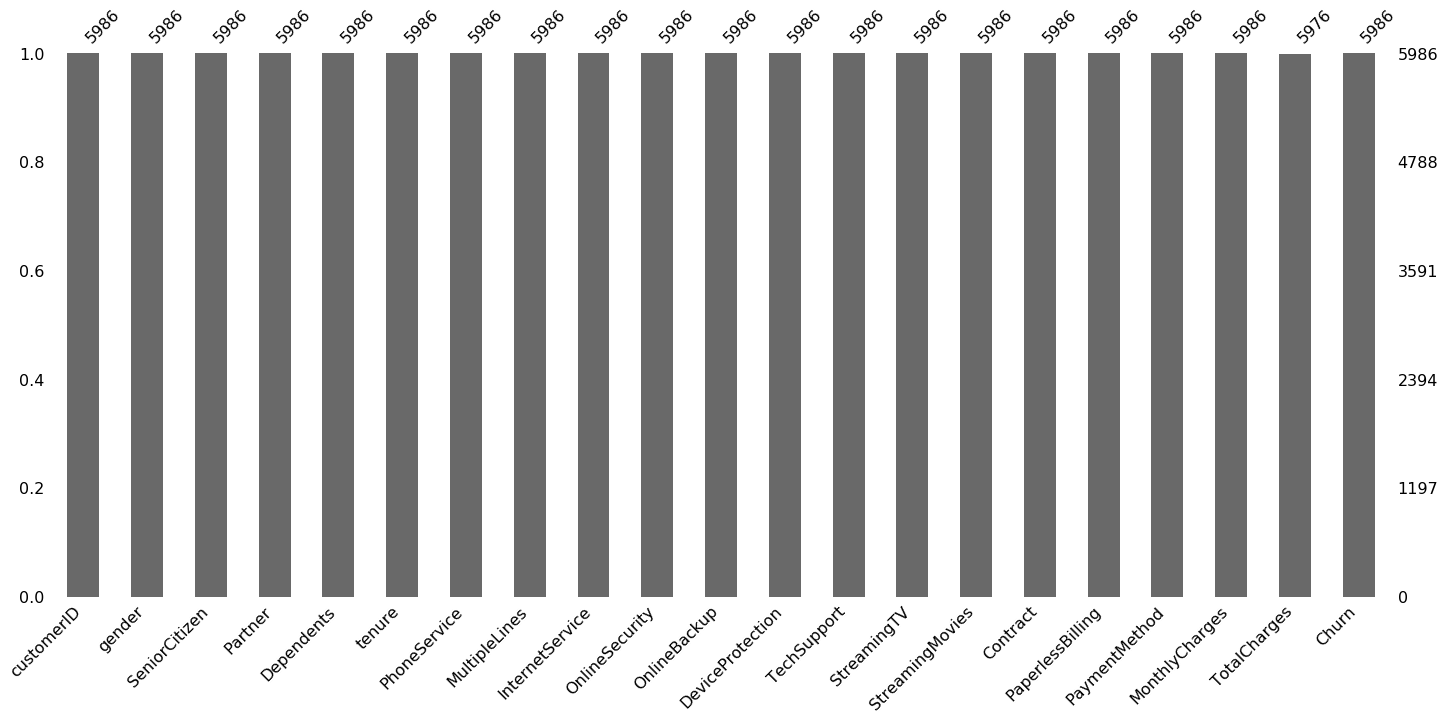

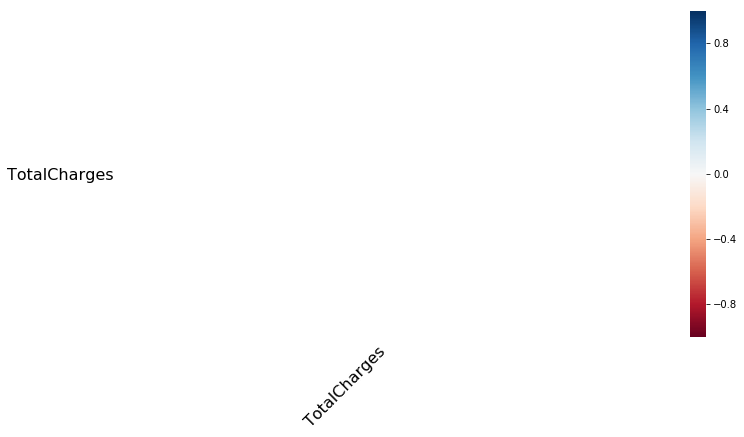

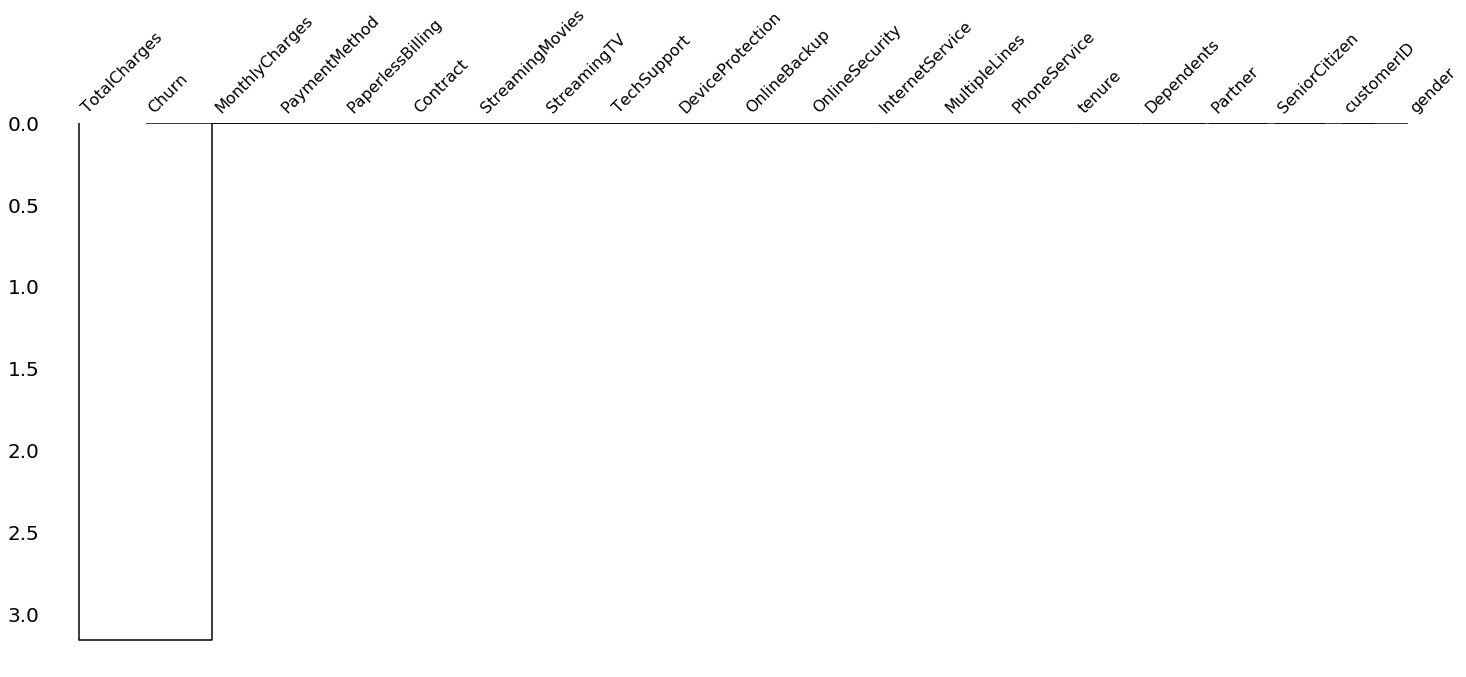

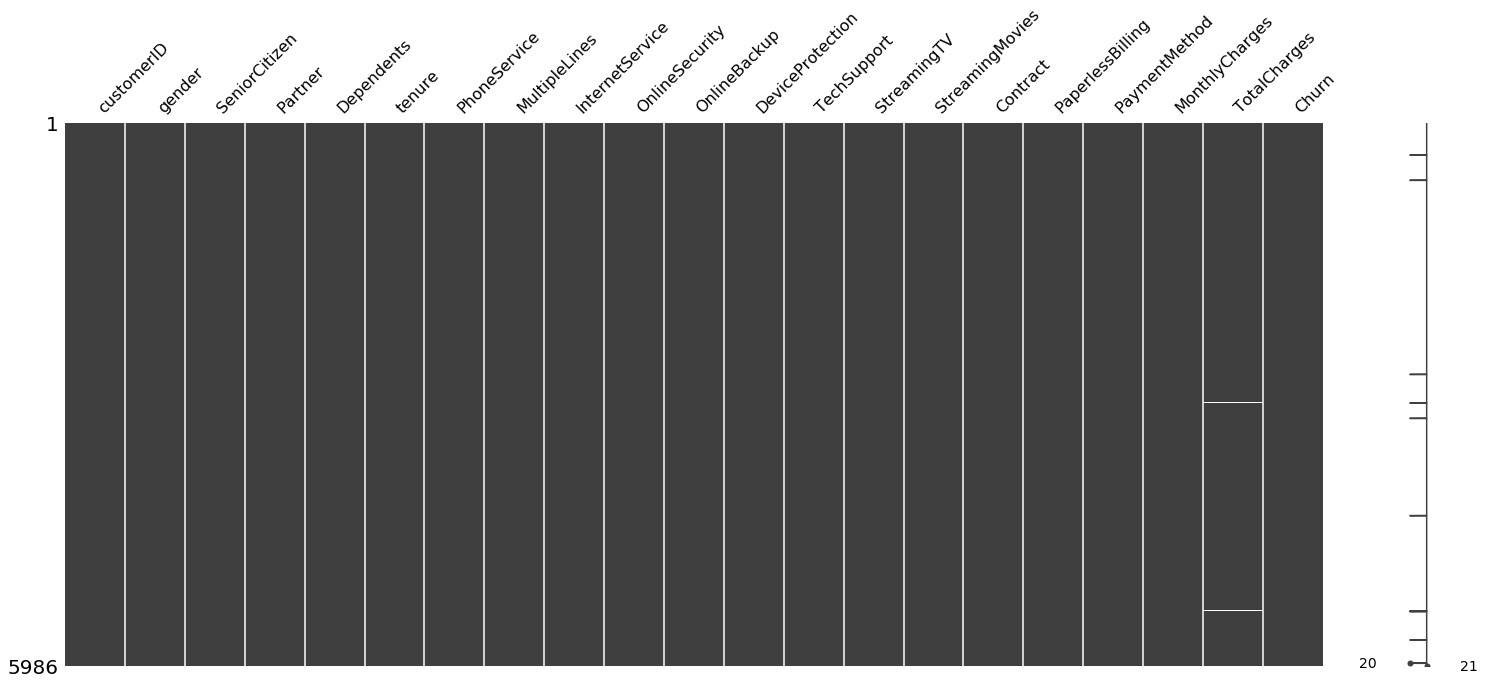

In [75]:
def mano_data():
    mano.bar(data)
    mano.heatmap(data, figsize=(12,6))
    mano.dendrogram(data)
    mano.matrix(data)
mano_data() 

In [76]:
def num_col_analysis():
    
    global data
    
    data1 = pd.DataFrame(data)
    
    data1.hist(figsize=(20,20), bins = 30)
    plot.show()
    
    
    data1 = norm.rvs(size=1000)
    sm.qqplot(data1, line='45')
    pylab.show()
    
    print ("Kolmogorov Smirnov test")
    data1 = norm.rvs(size=1000)
    ks_statistic, p_value = kstest(data1, 'norm')
    print(ks_statistic, p_value)
    if p_value > 0.05:
        print ("Normal Distribution")
    else:
        print ("Data is not normally distributed")
        
    print ("Shapiro Wilk test")   
    data1 = norm.rvs(size=500)
    stat, p = shapiro(data1)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Fail to reject H0 that is data is normal distributed")
    else:
        print("Reject H0 that is data is normally distributed")    

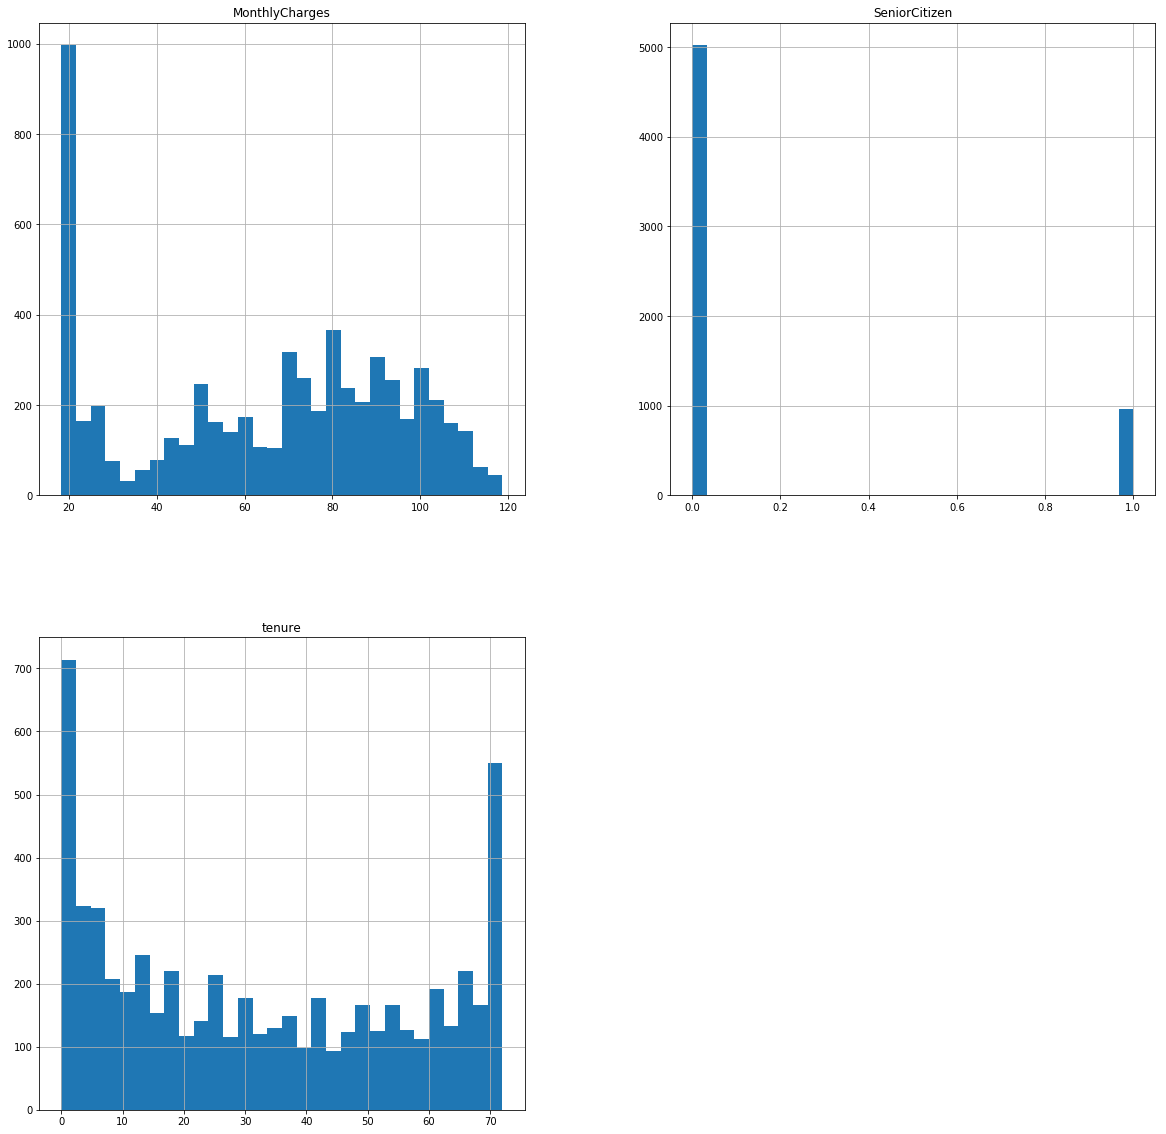

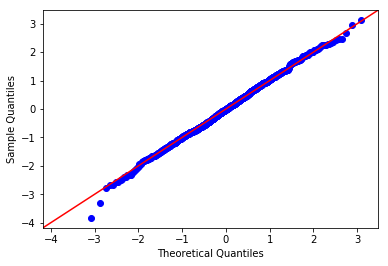

Kolmogorov Smirnov test
0.04085380188562249 0.06906806625640739
Normal Distribution
Shapiro Wilk test
Statistics=0.998, p=0.875
Fail to reject H0 that is data is normal distributed


In [77]:
num_col_analysis()


In [78]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [79]:
def drop_val():
    global data
    d_col = input("Enter the column name whose null values you want to delete : ")
    data = data.dropna(axis=0, subset=[d_col])
    return data

def missing_value_numeric():
    n = int(input("Enter the number of columns you want to convert into numeric : "))
    for i in range(0,n):
        col_name = input("Enter column name : ")
        for col in col_name:
            data[col_name] = pd.to_numeric(data[col_name], errors='coerce')
        mean_imputation = SimpleImputer(strategy='mean')
        data[[col_name]]= mean_imputation.fit_transform(data[[col_name]])
    print (data.isnull().sum())    
    return data.dtypes
    
def missing_value_catgorical():
    n = int(input("Enter the number columns you want to convert into categorical columns : "))
    for i in range(0,n):
        col_name = input("Enter column name : ")
        for col in col_name: 
            data[col_name] = data[col_name].astype("category")
        mode_imputation = SimpleImputer(strategy='most_frequent')
        data[[col_name]]= mode_imputation.fit_transform(data[[col_name]])
    print (data.isnull().sum())    
    return data.dtypes  

In [80]:
drop_val()

Enter the column name whose null values you want to delete : TotalCharges


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 21 columns):
customerID          5976 non-null object
gender              5976 non-null object
SeniorCitizen       5976 non-null int64
Partner             5976 non-null object
Dependents          5976 non-null object
tenure              5976 non-null int64
PhoneService        5976 non-null object
MultipleLines       5976 non-null object
InternetService     5976 non-null object
OnlineSecurity      5976 non-null object
OnlineBackup        5976 non-null object
DeviceProtection    5976 non-null object
TechSupport         5976 non-null object
StreamingTV         5976 non-null object
StreamingMovies     5976 non-null object
Contract            5976 non-null object
PaperlessBilling    5976 non-null object
PaymentMethod       5976 non-null object
MonthlyCharges      5976 non-null float64
TotalCharges        5976 non-null object
Churn               5976 non-null object
dtypes: float64(1), int64(2), obj

In [82]:
X = data.drop('Churn', axis = 1)
rey = {'No': 0, 'Yes': 1}
data['Churn'] = data['Churn'].map(rey)
Y = data['Churn']

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
from sklearn.preprocessing import LabelEncoder

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include = ['object']).columns.tolist()


def label_encoder(data):
    for i in cat_cols:
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])
    return data

label_encoder(data)

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4243,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1065,0
1,5796,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,2900,0
2,5567,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2125,1
3,4234,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,1732,0
4,1269,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,307,0
5,2553,0,0,1,0,70,0,1,0,2,...,2,2,0,2,2,1,0,49.85,2506,0
6,1471,0,0,0,0,33,1,2,1,2,...,0,0,0,2,0,1,2,90.65,2218,0
7,2585,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,3,24.90,1755,0
8,5353,1,0,0,0,39,0,1,0,0,...,2,2,0,0,1,0,3,35.55,488,0
9,4831,1,1,0,0,55,1,2,1,2,...,2,2,2,2,0,1,2,116.50,4418,0


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


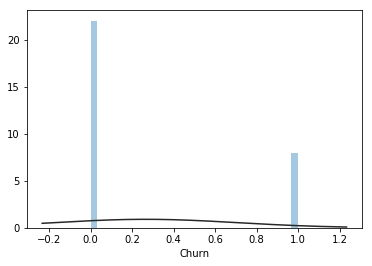

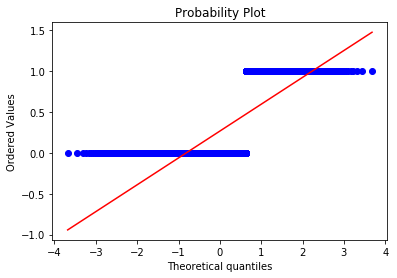

In [90]:
X = data.copy() 
Y = data['Churn']
X = X.drop(['Churn','customerID'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

sns.distplot(Y,kde=False,fit=norm,bins=30)
plot.show()
stats.probplot(Y, dist="norm", plot=pylab)
plot.show() 

In [91]:
sm = SMOTE(random_state=1234)
X_smote, Y_smote = sm.fit_sample(X_train, Y_train)
#Y_smote.value_counts(normalize=True) * 100

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


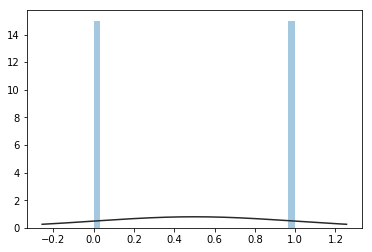

In [92]:
sns.distplot(Y_smote,kde=False,fit=norm,bins=30)
plot.show()

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smote)
X_smote = scaler.transform(X_smote)
X_test = scaler.transform(X_test)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_smote, Y_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
y_pred = classifier.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[620 254]
 [ 99 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       874
           1       0.47      0.69      0.56       322

    accuracy                           0.70      1196
   macro avg       0.66      0.70      0.67      1196
weighted avg       0.76      0.70      0.72      1196

Accuracy: 0.7048494983277592
